# U of U IS Deep Learning Study Group - Notes #1
#### Author: Brian Sheng
#### Art Credit: Stephen Vickers

In [1]:
from IPython.display import YouTubeVideo
import tensorflow as tf
import sympy as sp
from sympy import Matrix
sp.init_printing("latex")

Deep Learning has been getting a lot of attention lately. The question is why... and does it live up to the hype? Well, you may know that our ability to train and run bigger neural networks due to our increase in compute power since days past is a big part of it. 

**Note**: This notebook explains things from the ground up, and you may be familiar with some of these concepts already. The intention of the simplistic explanations is not to insult or condescend, but to couch things in as simple terms as possible, but no simpler. As a result, plain English is often used to introduce heady concepts in layman's terms. Feel free to skim through concepts you're already solidly familiar with, but please be open to alternative perspectives that may be enlightening.

If you want the abridged version of everything, I'd suggest reading the headings, reading around the *bolded statements*, looking at the visuals, reading the formulas, and reading things that are indented in HTML quotes style like this:
> This is HTML quote style

At the same time it's important to know that I do not hold a Ph.D in Computer Science, nor am I currently an industy leader in AI, so what is written here is not dogma. I am simply a determined amateur who is doing his best to fill his knowledge gaps and do some good science. Many of the makers of these resources *are* experts in their field however, and I would advise that you go through them:

## Additional Learning Resources
**The de facto Deep Learning textbook from Goodfellow et al (free!)**:
http://deeplearningbook.org/

**An easier online Deep Learning textbook (free!)**:
http://neuralnetworksanddeeplearning.com/

**Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (~$32)**:
https://www.amazon.com/gp/product/1491962291

**Hands-On Machine Learning Github (free code and Jupyter Notebooks!)**:
https://github.com/ageron/handson-ml

**How Deep Neural Networks Work**: 
https://www.youtube.com/watch?v=ILsA4nyG7I0

**How Convolutional Neural Networks work**:
https://www.youtube.com/watch?v=FmpDIaiMIeA

**CS231N Winter 2016 Lectures from Andrej Karpathy at Stanford**: https://www.youtube.com/playlist?list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC

**CS231N Winter 2016 Lecture Notes**:
http://cs231n.github.io/

**ConvNetJS (neural nets in your browser with JavaScript!)**:
http://cs.stanford.edu/people/karpathy/convnetjs/

**Hvass Labs TensorFlow Jupyter Notebook Tutorials with YouTube Videos**:
https://github.com/Hvass-Labs/TensorFlow-Tutorials

**Stanford's Deep Natural Language Processing Video Lectures**:
https://www.youtube.com/playlist?list=PL3FW7Lu3i5Jsnh1rnUwq_TcylNr7EkRe6

**Berkeley's Deep Reinforcement Learning Course (even more learning resources recommended there!)**:
http://rll.berkeley.edu/deeprlcourse/

**YouTube playlist for developing visual intution for linear algebra**:
https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

**YouTube playlist for developing visual intution for calculus**:
https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr

**Backpropagation Example Python Code:**
https://iamtrask.github.io/2017/03/21/synthetic-gradients/
https://iamtrask.github.io/2015/07/12/basic-python-network/

With that out of the way, let's proceed.

## Introduction and Learning Goals

### Introduction
#### Why can we go deeper? Why are neural nets suddenly working better?

In a nutshell:
- Backpropagation has been around for a while
- Neural nets are nothing new

#### Why are neural nets hot right now?
- More compute power
- More data
- Use of different neural net types
	- Convolutional Neural Net architectures exist that have ~10^2 layers (not all “layers” have neurons)
	- Vanilla Fully-Connected Nets usually don’t see much benefit from >3 layers depending on the application
	- Recurrent Net depth is <10^1 layers, usually more like 4 or 5. (due to nature of computation and exacerbated vanishing/exploding gradient problems)
- Use of different units
	- ReLU for ConvNets, some RNNs, Fully Connected Nets
	- LSTMs and GRUs for RNNs
	- These units train better and/or address vanishing/exploding gradients
- Better initialization
	- RBMs initially pre-trained and then stacked to create Deep Belief Networks
	- Turns out better initialization is all you really need (don’t need RBMs)
	*Citation: Andrej Karpathy’s CS231N lectures 4, 5, 6.
	- Small random values, normally or uniformly distributed depending on the network type, with std dev depending on number of inputs and outputs for a given neuron.
*RBM  = Restricted Boltzmann Machine
- Better regularization (L2, Dropout, DropConnect, Early Stopping, Ensemble, Bagging)

An *in-a-nutshell* statement on the current state of AI from DARPA can be found here:

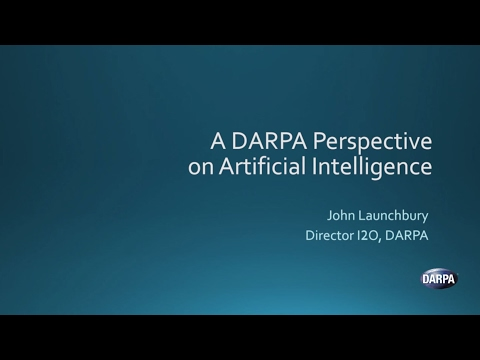

In [2]:
YouTubeVideo('-O01G3tSYpU')

An *in-a-nutshell* explanation of deep neural nets can be found here:

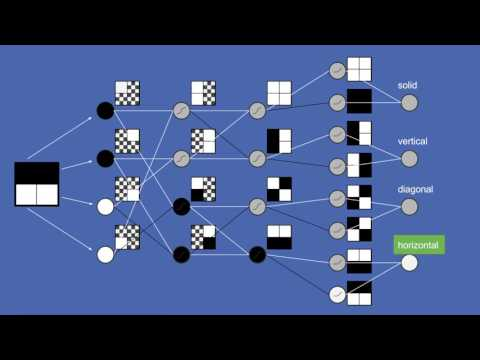

In [3]:
YouTubeVideo('ILsA4nyG7I0')

### Learning Goals for this Group
- Develop a better intuition of how neural nets function from the ground up.
- Develop an intuition for tuning deep neural net models in practice.
- Develop skills for use in practice, research, etc.

#### How to accomplish this?
- Presentations from week to week.
- Hopefully lecture notes and code to play with on Git service of our choosing.

## Effect of Depth & General Intuitions

### Networks Have Layers
You likely know that the *Deep* in *Deep Learning* is due to the large number of layers in some networks that have performed quite well on modern AI tasks in recent years. For the sake of review and reference, in a nutshell, each layer is either an input, an output, or the result of an element-wise activation function that has been applied to the result of a matrix multiply followed by an addition operation with a *bias vector*. These output vectors are the *layers*, and the weights in the matrices are the connections between them. Layers that aren't the output or input layer are called *hidden* layers.
<img src ='assets/296px-Colored_neural_network.png'>
Image credit: https://en.wikipedia.org/wiki/Artificial_neural_network

### Learning of Meaningful Features
The meaningful *features* that a learning system is meant to grab onto are traditionally designed by human domain experts, resulting in very complicated operations on the input data, and complex functions being fed into each *layer* of the network. The general idea with neural nets is to instead allow a learning system to define its own features as it is trained on the data. Each layer can be seen as a **layer of abstraction**, with the network creating more complicated features from simpler features. This can be seen as building up more complicated concepts from simpler ones. This can be seen in convolutional neural nets, with the learned *filters* getting more complicated as we go from input layer to output layer. 

<img src = 'assets/depth_composition_goodfellow.png' width='640px'>
Image credit: <strong data-cite="goodfellow2016">(Goodfellow et al, 2016)</strong>

### Repeated Kernel Trick (Warp & Slice)
In the example of a 2d data space, and classifying inputs as one of two things, you can think of a neural network as repeatedly stretching, warping, and squashing the space of data to allow for the drawing of a flat plane to separate the data. It's like taking a sheet of rubber and warping it into some weird shape before freezing it and slicing through it with a knife. Each layer results in another warping of the sheet, and the final layer corresponds to the last warping, followed by a slice with a knife. The number of *neurons* type of *activation function* for a given layer will determine the warping type. You can see that warpings generally **get more complex with number of neurons**, and that **adding layers nests these warpings together**, feeding them into one another like Russian nesting dolls.

<img src = 'assets/layer_sizes_cs231n.jpeg' width='640px'>
Image credit: <strong data-cite="karpathy-et-al2016">(Karpathy et al, 2016)</strong>

This can be seen in this interactive demo from Andrej Karpathy of such a neural net that runs in your browser: http://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html

Explanation of demo:

In [4]:
YouTubeVideo('i94OvYb6noo?t=1h10m45s')

### Neural Nets as Universal Function Approximators
Neural Nets can be shown to approximate just about any arbitrary function given non-linear activation functions and enough units. Essentially, if you give neural nets enough capacity to learn and represent complex outputs, then you'll tend towards being able to output whatever arbitrary thing as long as it's a function on the input. See these chapters for much more detailed and rigorous explanations:
http://neuralnetworksanddeeplearning.com/chap4.html
http://www.deeplearningbook.org/contents/mlp.html


### Problems with Depth
The problem is that when you increase depth on a network you also make it considerably harder to train. This is due to the way that the network learns for the network being tied to depth in a way that parts of the network further removed from the output will be less affected by the learning mechanism, which operates on a function of the output error of the network. Modern methods find ways around this with the aforementioned tweaks in our Introduction section to give *Deep Learning*, where we can effectively train very deep neural nets given some caveats (mainly convolutional neural nets it seems).

**I strongly recommend now playing with the aforementioned ConvNetJS two-class neural net classifier with visualization. It will give you intuition about the concepts and ideas discussed in this section**

## Neural Nets as Composed Functions & Computational Graphs
Neural nets can be viewed as nested, or "composed", functions. They are functions of functions of functions of inputs. Looking at the top level of abstraction, they can be unhelpfully viewed as literal boxes of *magic*. This view of (unwitting) data being pulled in to a box of magic to produce (suave) output is a bit to simplistic and doesn't really help us, so let's break it down a bit deeper. 

<img src = 'assets/MAGIC_box.png'>

### Computational Graphs
Taking the example of a neural net with one hidden layer, if we break down the magic box into the machines that it's made out of, we have a representation that looks like this:

<img src = 'assets/factory_in_disarray.png' width=640px>

If it looks like bedlam and chaos, that's because those little workers are computing something important in an inefficient way. We'll come back to that later.

You can see that there's a matrix multiply with bias and activation function to go from input to hidden layer, then another set of matrix multiply with bias and activation function machines to go from hidden layer to output. (On a related note, this YouTube playlist gives an excellent series of intuitive explanations of linear algebra concepts, enjoyable even for the seasoned pro: https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

If you examine the first machine in the line, you'll see that matrix multiply and bias machines look like this:
<img src = 'assets/matmul_machine.png' width=320px>

Let's clean things up a bit and go back to a more helpful version of *magic* boxes. In the process, we'll also break the operations down into their useful components, or smaller magic boxes. Here's the same matrix multiply and bias operation in terms of magic boxes:

<img src = 'assets/matmul_graph.png'>

You can see that it's pretty much exactly what it says on the tin. It's the multiplication of some input **x** with some matrix **W<sub>1</sub>** using *****, followed by the addition of a bias **b<sub>1</sub>** using **+** to the result. If we keep the activation function interchangeable and leave it as a magic box labelled **f**, we can then represent our neural network as a series of magic boxes chained together like this. When you expand it all out, it looks something like this:

<img src ='assets/computational_graph.png' width=640px>

This series of chained boxes that takes an input and spits out some outputs is a **computational graph**. In the case of neural nets, it has the property where you can always find a beginning input that depends only on itself, and also the property where you can't get caught in an infinite loop. This is called **acyclic dependency**, and will be a helpful property later. 

### Optimal Substructure & Gradients of Composed Functions with the Chain Rule
You may notice that each box in this graph may depend on other boxes feeding into their input. They are therefore *functions* of these other input boxes. These input boxes are also functions, so we have functions of functions. The end result of the graph is a nested or composed function. If you were to find the change of the output of this graph with respect to the change in some part further back in the graph, this would be the **derivative** of the output with respect to that part. Since these are vector or matrix shape parts, we get vector or matrix-shaped derivatives. These vector or matrix-shaped derivatives would be called our **gradients**.

<img src = 'assets/grad_dependency.png'>

It is important to note another property of this computational graph. The gradients of the output with respect to each box happen to depend on each other. You can make gradients from other gradients. Solutions from smaller solution pieces. This is called **optimal substructure**, and it is also a helpful property for us. The fact that the whole computational graph is a bunch of functions composed together means that we compute these gradients using the **chain rule**. Borrowing from Wikipedia's chain rule explanation, in short, the derivative of an outer function

$$F(x)=f(g(x))$$

with respect to an inner function's input (the single quote indicates a derivative of F(x)) **F'(x)** is computed by:

$$F'(x) = f'(g(x))g'(x)$$

This means that the derivative of the outside function with respect to the inside function's input is equal to the derivative of the outside function with respect to the inside function multiplied by the derivative of inside function with respect to the inside function's input.

Alternatively, if you set $z=F(x)=f(g(x))=f(y)$ and $y=g(x)$, then you can rewrite this as:

$$\frac{dz}{dx}=\frac{dz}{dy}\frac{dy}{dx}=F'(x) = f'(g(x))g'(x)$$

Where $\frac{dz}{dx}$ is the derivative of z with respect to x, $\frac{dz}{dy}$ is the derivative of z with respect to y, and $\frac{dy}{dx}$ is the derivative of y with respect to x. You can see that the $dy$ numerator and denominator appear to cancel, leaving $\frac{dz}{dx}$ as the result.

The notation of $\frac{dz}{dx}$ for the derivative reflects the fact that it's *like* the ratio between a tiny change in $z$ due to a tiny change in its input $x$ by $dx$ 

$$dz\approx z(x+dx)-z(x)$$

and that tiny change dx. When $dx$ is *infinitely small* (take the "limit" as is goes to zero) then the derivative is *literally* that ratio and we get:

$$\frac{dz}{dx}=\lim_{dx \to 0}\frac{z(x+dx)-z(x)}{dx}$$

If the function has multiple inputs, then you're taking a *partial derivative* when you take the derivative w.r.t that input while holding everything else constant. The notation for that looks like:



$$\frac{\partial z}{\partial u}=\frac{\partial z}{\partial x}\frac{\partial x}{\partial u},z=f(x,y),x=g(u,v)$$

You can see that we multiply gradients together with other gradients to get our final gradients of the output with respect to each box output or input(e.g. **W<sub>1</sub>** is a box input, $\boldsymbol{f}(\boldsymbol{W_1 x}+\boldsymbol{b_1})$ is the output of the first **f** box) . Chain rule is described here: https://en.wikipedia.org/wiki/Chain_rule.

If this is your first exposure to calculus and you've never heard of the chain rule before, then this YouTube playlist may also prove useful (The Essence of Calculus): https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr

The video from that playlist related to the Chain Rule is here:

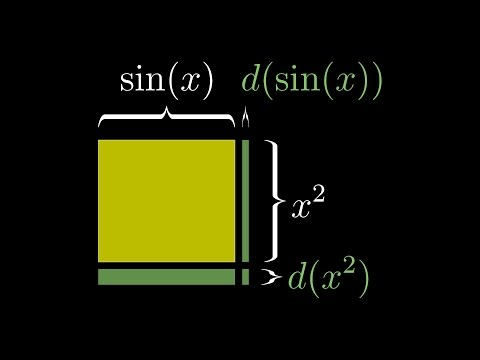

In [5]:
YouTubeVideo('YG15m2VwSjA')

How the gradients pass through split inputs on addition and multiplication is covered here (related to the Backpropagation section):
http://cs231n.github.io/optimization-2/

Now, why do we want the gradient? Well, since that output *J* indicates how bad our neural net is doing on the training data, we want to make that as small as possible. Some parts that go into *J* can't be helped. Some of these bits can be helped, and would be called the **parameters** of our model that are free to change. These would be **W<sub>1</sub>** **b<sub>1</sub>** **W<sub>2</sub>** **b<sub>2</sub>**, and free to vary during the training process. We use the gradient of that *J* with respect to these parameters to change these parameters during training. This will move them in a direction to minimize that loss, *J* on the training data. This process is Gradient Descent, and is covered in the next section.

## Gradient Descent & Backpropagation

### Gradient Descent
So, you have a neural net that has an associated loss function. To get it to learn, we minimize this loss function with respect to the training data, fitting it to the data. The general way to do this is with any number of modified versions of *Gradient Descent*.

Looking in the  motivation section of Wikipedia page for gradient:
https://en.wikipedia.org/wiki/Gradient
> *Consider a surface whose height above sea level at point (x, y) is H(x, y). The gradient of H at a point is a vector pointing in the direction of the **steepest slope or grade at that point.** The steepness of the slope at that point is given by the magnitude of the gradient vector.*

<img src ='assets/Gradient_descent.png'>
Image credit: https://en.wikipedia.org/wiki/Gradient_descent

Subtracting the gradient from its associated vector or  function is like heading away from the direction of *steepest ascent*. You are heading in the direction of *steepest descent*, hence **Gradient Descent**. Intuitively, if you're heading towards a direction of steepest descent, eventually you will reach a flat spot or region locally. You will arrive at a *local minimum* of the matrix function. See the Wikipedia page for more info:

https://en.wikipedia.org/wiki/Gradient_descent

The general formula of interest is:
$$u_{t+1}=u_{t}-\alpha \nabla f(u_t)$$

Where $u$ is a parameter of the function $f(u)$, $u_{t+1}$ is the new value of $u$, $u_t$ is the old value of $u$, $\alpha$ is a scalar real number value, and $\nabla f(u_t)$ is the gradient of $f(u_t)$. The important thing to keep in mind here is that $u$ can be any arbitrary shaped matrix, vector, or tensor, but the shapes of $u_{t+1}$, $u_{t}$, and $\nabla f(u_t)$ must be the same for gradient descent to work. That seems a bit obvious, but this will be important later.

### Computing Gradients

The naive way to compute the gradients we need for our parameters is to repeatedly apply the chain rule over and over again. This however, results in use repeating ourselves much more than necessary. Let's look at the example where we need to compute the gradient of *J* w.r.t. (with respect to) **W<sub>1</sub>** **b<sub>1</sub>** **W<sub>2</sub>** **b<sub>2</sub>** as in our computational graph for a one hidden layer neural net with activation functions on the hidden and output layers.

<img src ='assets/computational_graph.png' width=640px>

As for taking the derivative (differentiation) w.r.t a vector, the following video should outline the idea behind it:

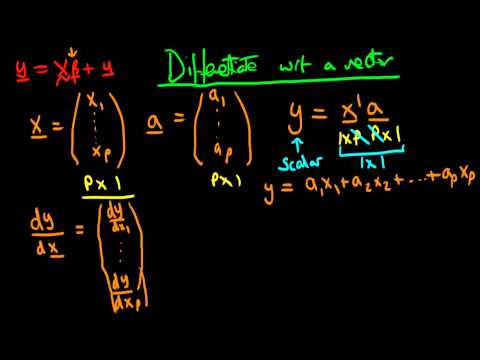

In [6]:
YouTubeVideo('iWxY7VdcSH8')

Differentiation of a vector $\boldsymbol{f}$ w.r.t to another vector $\boldsymbol{x}$ gives the Jacobian matrix of $\boldsymbol{f}$ w.r.t $\boldsymbol{x}$, $\frac{\partial \boldsymbol{f}}{\partial \boldsymbol{x}}$, which is of the form:

$$
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_m} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_n}{\partial x_1} & \dots & \frac{\partial f_n}{\partial x_m}
\end{bmatrix}
$$

This gives us this horrid mess of formulas from the Chain Rule, which we'll stick here for the sake of reference:

$\boldsymbol{x}=$ Inputs

$\boldsymbol{z_1}=\boldsymbol{W_1 x}+\boldsymbol{b_1}=$ Input values to "hidden" activation function

$\boldsymbol{a}=\boldsymbol{f}(\boldsymbol{z_1})=$ Hidden Activations

$\boldsymbol{z_2}=\boldsymbol{W_2 a}+\boldsymbol{b_2}=$ Inputs to "output" activation function

$\boldsymbol{y ̂}=\boldsymbol{f}(\boldsymbol{z_2})=$Output Activations

$$
\frac{\partial J}{\partial \boldsymbol{b_2}}
=
\frac{\partial J}{ \partial \boldsymbol{y ̂ }}  
\frac{\partial \boldsymbol{y ̂ }}{\partial \boldsymbol{z_2} }  
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{b_2} }
$$

$$
\frac{\partial J}{\partial \boldsymbol{y ̂}}  
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}}
=
\frac{\partial J}{\partial \boldsymbol{y ̂}}  
\odot
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}}
=
\boldsymbol{\delta_2}
$$

Where $\odot$ is **element-wise multiplication**, a.k.a the Hadamard Product: https://en.wikipedia.org/wiki/Hadamard_product_(matrices), and $\frac{\partial \boldsymbol{y ̂ }}{\partial \boldsymbol{z_2} }$ is the derivative of the output activation function w.r.t its inputs.

$$
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{b_2}}=\frac{\partial}{\partial \boldsymbol{b_2}}\left( \boldsymbol{w_2 a}+\boldsymbol{b_2}\right)=\boldsymbol{1}
$$

Where 
$\boldsymbol{1}$ is the ones vector. (i.e. $\boldsymbol{1}=\begin{bmatrix}
         1 \\
         ... \\
         1
        \end{bmatrix}$
        for some arbitrary length) 
        In the case of 
        $\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{b_2}}$
        , the length of the vector is the same as the length of 
        $\boldsymbol{b_2}$.

$$
\frac{\partial J}{\partial \boldsymbol{b_2}}
=
\boldsymbol{\delta_2}
\odot
\boldsymbol{1}=\boldsymbol{\delta_2}
$$

$$
\frac{\partial J}{\partial \boldsymbol{ w_2 }}
=
\frac{\partial J}{ \partial \boldsymbol{y ̂ }}  
\frac{\partial \boldsymbol{y ̂ }}{\partial \boldsymbol{z_2} }  
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{w_2} }
=
\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{w_2}}
$$

$$
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{w_2}}
=
\frac{\partial}{\partial \boldsymbol{w_2}}
\left( \boldsymbol{w_2 a}+\boldsymbol{b_2}\right)
=
\boldsymbol{a}^T$$

$$\frac{\partial J}{\partial \boldsymbol{ w_2 }}
=
\boldsymbol{\delta_2}
\otimes
\boldsymbol{a}
=
\boldsymbol{\delta_2}\boldsymbol{a}^T
$$

Where $\otimes$ is the **outer (or tensor) product**: https://en.wikipedia.org/wiki/Outer_product

$$\frac{\partial J}{\partial \boldsymbol{b_1}}
=
\frac{\partial J}{\partial \boldsymbol{y ̂}} 
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}} 
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} }  
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} } 
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{b_1} }
=
\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} } 
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} } 
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{b_1}}
$$

Where $\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} }$ is the derivative of the hidden activation function w.r.t. its inputs. 

$$
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a}}
=
\frac{\partial}{\partial \boldsymbol{a}}
\left( \boldsymbol{w_2 a}+\boldsymbol{b_2}\right)
=
\boldsymbol{w_2}^T
$$

$$
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{b_1}}
=
\frac{\partial}{\partial \boldsymbol{b_1}}
\left( \boldsymbol{w_1 x}+\boldsymbol{b_1}\right)
=
\boldsymbol{1}
$$

$$\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} }
=
\langle \boldsymbol{w_2},\boldsymbol{\delta_2}\rangle
=
\boldsymbol{w_2} \cdot \boldsymbol{\delta_2} 
=
\boldsymbol{w_2}^T\boldsymbol{\delta_2}
$$

Where $\langle \boldsymbol{w_2},\boldsymbol{\delta_2}\rangle$ is the **inner product** (in this case, called the **dot product**) of the matrices $\boldsymbol{w_2}$ and $\boldsymbol{\delta_2}$ :
https://en.wikipedia.org/wiki/Inner_product_space
https://en.wikipedia.org/wiki/Dot_product

$$
\frac{\partial J}{\partial \boldsymbol{b_1}}
=
\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} } 
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} } 
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{b_1}}
=
\langle \boldsymbol{w_2},\boldsymbol{\delta_2}\rangle
\odot \frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} }
\odot \boldsymbol{1}
=
\boldsymbol{\delta_1} \odot \boldsymbol{1}
=
\boldsymbol{\delta_1} 
$$

$$
\frac{\partial J}{\partial \boldsymbol{ w_1 }}
=
\frac{\partial J}{\partial \boldsymbol{y ̂}} 
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}} 
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} } 
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} } 
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{w_1}}
=
\boldsymbol{\delta_1}
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{ w_1 }}
$$

$$
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{ w_1 }}
=
\frac{\partial}{\partial \boldsymbol{ w_1 }}
\left( \boldsymbol{w_1 x}+\boldsymbol{b_1}\right)
=
\boldsymbol{x}^T
$$

$$
\frac{\partial J}{\partial \boldsymbol{w_1}}
=
\boldsymbol{\delta_1}
\otimes
\boldsymbol{x}
=
\boldsymbol{\delta_1}
\boldsymbol{x}^T
$$

So, that was most likely a bit overwhelming. We'll go through that in a more intuitive manner in a bit, but now you have the formulas for reference later. 

You can see there's a lot of repeated work in these formulas. Terms like 
$\frac{\partial J}{\partial \boldsymbol{y ̂}} 
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}} 
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} } 
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} }$
contain other terms, such as 
$\frac{\partial J}{ \partial \boldsymbol{y ̂ }}  
\frac{\partial \boldsymbol{y ̂ }}{\partial \boldsymbol{z_2} }  $.

If you were to simply calculate everything straight-ahead without reusing work, you'd be repeating a lot of derivative calculcations unnecessarily. If we go back to the factory analogy with the workers computing the gradients, you can see it goes right back to bedlam and chaos very quickly if we use the straight-ahead method.
<img src = 'assets/factory_in_disarray.png' width=640px>
This is where backpropagation comes in.

### The Essence of Backpropagation
Backpropagation takes advantage of two properties of the computational graphs of neural nets to do these calculations without having to recalculate anything. The properties of **acyclic dependency** and **optimal substructure** allow for fancy thing called **Dynamic Programming** to be applied to the problem of calculating gradients. In this case, Dynamic Programming just means that we make sure to start with a calculation that is self contained and doesn't depend on stuff we don't have (the beginnning/end of the graph), then move on to using that result to calculate things that depend on it, then continue onto things that depend on that next result and so on.

We start from the *beginning* to calculate that *initial thing* and work our way through building *things* that depend on that *initial thing*, then building *new things* that depend on those *things* and so on, all the while making sure to compute everything without repeating work unnecessarily.
With this in mind, we can see that:
* The *things* we're building up are the gradients of the loss function output $J$ w.r.t each part.
* Our beginning is at the loss function output $J$.
* We can determine an order to do the calculations in by performing a **topological sort** on the compuational graph, or just keep track of what we've computed and check if we've computed something already before doing it, which is called **memoization**.
* Once we've computed everything that we need to, we're done.

You can see the **acyclic dependency** and **optimal substructure** of the problem in our diagram of the interdependencies of the gradient from earlier:

<img src = 'assets/grad_dependency.png'>

### Backpropagation from the Top-Down: Keeping Track of Shape
Let's walk through the example with one hidden layer we had before, and go through the formulas in more depth. One thing that tends to trip people up is keeping track of the shapes of all the vectors and matrices.

The shape of the matrices/tensors during feedforward and backprop is important to keep in mind. Things get confusing when you mix it up. It's easy to get lost in the abstract world of formulas, resulting in getting all the parts that you need for computation without knowing how to put them together to make actual gradients. So, let's go through the process *backwards* and figure out how things are suppose to fit together, and what shape everything is before slowly revealing more detail about the parts we're assembling.

Remember that formula for gradient descent?
$$u_{t+1}=u_{t}-\alpha \nabla f(u_t)$$

Well, we need to make sure that $u_{t}$ and $\nabla f(u_t)$ are the same shape. If we look at some operations available for us to play with, we can see some preserve shape while others do not. Let's set up some weight matrices and bias vectors to look at while we go through this example. We'll use the SymPy Python library for its array data structures and operations, and print things out as we go along. We'll use a neural network that looks like the following figure:

<img src ='assets/296px-Colored_neural_network.png'>

This network has 3 input units, 4 hidden units, and 2 output units. If we use column vectors in our matrix multiplications, we'll have two weight matrices and two bias vectors for our input-to-hidden and hidden-to-output mappings. The input-to-hidden weight matrix and bias vector will be $\boldsymbol{w_1}$ and $\boldsymbol{b_1}$, and the hidden-to-output weight matrix and bias vector will be $\boldsymbol{w_2}$ and $\boldsymbol{b_2}$, as before.

#### Non-Square Matrices as Transformations Between Dimensions (Shape Changing)
A matrix can be viewed as encoding a linear function, and non-square matrices can be views as encoding linear functions between dimensions. If you're operating on column vectors, then the number of rows encodes the output dimensionality, and the number of columns is input dimensionality. So a matrix like the following one encodes a transformation from 4 dimensional vectors to 2 dimensional vectors.

$$\begin{bmatrix}
         1 & 1 & 1 & 1\\
         1 & 1 & 1 & 1
        \end{bmatrix}$$

A matrix multiply between a 4D vector and such a matrix will produce a 2D vector.

$$\begin{bmatrix}
         1 & 1 & 1 & 1\\
         2 & 2 & 2 & 2
        \end{bmatrix}\begin{bmatrix}
         2 \\
         2 \\
         2 \\
         2
        \end{bmatrix}=\begin{bmatrix}
         8 \\
         16
        \end{bmatrix}$$

You can see that a non-square matrix multiplication of this kind can be seen as a magic box that takes in an input of one shape, and makes an input of another shape.

<img src = 'assets/matmul_op.png' width=600px>

The video below gives a more in-depth understanding of how this is the case:

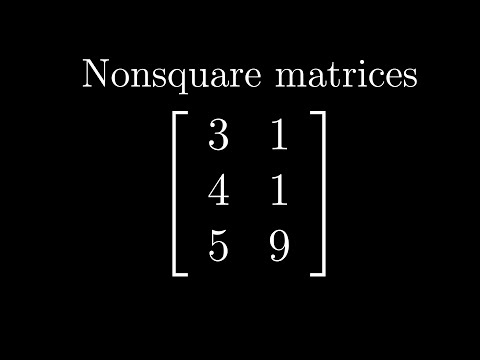

In [7]:
YouTubeVideo('v8VSDg_WQlA')

So, looking at that neural net figure again, we'll have a 3D input vector, which must map to a 4D hidden vector, which must in turn map to a 2D output vector. This means we'll need a (4,3) (or $4x3$ depending on your notation) shaped matrix for the input-to-hidden map and a (2,4) shaped matrix for the hidden-to-output map. Our $b_1$ and $b_2$ bias vectors get added in at the hidden an output layers, so they must be 4D and 2D themselves.

Let's make the variables for these in SymPy and go through a bunch of symbolic computations with matrices so we can get an idea of how things interact.

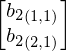

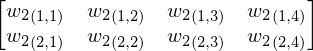

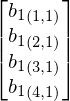

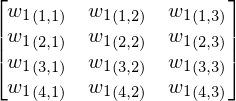

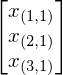

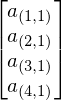

In [8]:
def names_2_sympy_str_list(shape, array_name):
    """Takes a shape tuple or list, and a string for the array name
    and makes a string formatted for making a sympy string of the same
    shape that is filled with symbols of the form:
    
    {array_name}_{indices of element in matrix}
                    
    Returns:
        A list of strings of the form:
        [{array_name}({rows+1}\,(1:{array.shape[1]})),
        {array_name}({rows+1}\,(1:{array.shape[1]})), ... ]
        
        To be fed to the sympy.symbols(...) function to create symbols
        to be fed into a symbolic matrix.
  """
    return ['{{{0}}}_{{({1}\,(1:{2}))}}'
            .format(array_name, rows+1, shape[1]+1) 
            for rows in range(shape[0])]


def string_list_to_sympy_matrix(sympy_string_list): 
    """Takes a list of lists of strings for feeding into sympy.symbols(...)
        and feeds the list to sympy.symbols(...) and sympy.Matrix(...) via
        string_list_to_matrix(...) to create a list of sympy matrices or a
        single sympy matrix depending on the arguments.
    """
    return Matrix(sp.symbols(sympy_string_list))


def sympy_matrices_from_names(shapes, names):
    """Takes a list of matrix shape tuples, and a list of names
    for the arrays (strings) and creates symbolic matrices
    of the form:
    |name_11 name_12|
    |name_21 name_22|
    |name_31 name_32|
    
    Returns:
        A list of matrices to be unpacked, or a single matrix
        if only one array is given.
  """
    assert(isinstance(shapes,(tuple,list))
           and isinstance(names,(str,tuple,list)))
    
    if isinstance(names,str):
        string_list_input = names_2_sympy_str_list(arrays, names)
        return string_list_to_sympy_matrix(string_list_input)
    else:
        assert(len(shapes)==len(names))
        string_lists = [names_2_sympy_str_list(arr, nam)
                        for arr, nam in zip(shapes, names)]
        matrices = [string_list_to_sympy_matrix(string_list)
                    for string_list in string_lists]
        return matrices if len(matrices)>1 else matrices[0]


parameter_and_variable_shapes = ((2,1), (2,1), (2,4), (4,1), (4,1), (4,3), (3,1), (4,1),)
parameter_and_variable_names = ('b_2', '\delta_2', 'w_2','b_1', '\delta_1', 'w_1','x','a')

(b_2, delta_2, w_2, b_1, delta_1, w_1,
 input_x, hidden_activations) = sympy_matrices_from_names(parameter_and_variable_shapes,
                                                          parameter_and_variable_names)
display(b_2, w_2, b_1, w_1, input_x, hidden_activations)

We'll have activation functions applied to the results of the matrix multiply and biasing on the hidden and output layers, but let's focus on the shape first.

In order to increment the $\boldsymbol{b_2}$ vector, we'll need one of the same size to subtract from it. Same goes for $\boldsymbol{w_2}$, $\boldsymbol{b_1}$, and $\boldsymbol{w_1}$. We want something that looks like this:

$$\boldsymbol{b_2}-\Delta \boldsymbol{b_2}
=
\begin{bmatrix}
         b_{2(1,1)} \\ 
         b_{2(2,1)}
        \end{bmatrix}
        -
        \begin{bmatrix}
         \Delta b_{2(1,1)} \\
         \Delta b_{2(2,1)}
        \end{bmatrix}
        $$

If we refer to some of the formulas from applying chain rule earlier, we see this needs to depend on the derivative of the loss $J$ w.r.t $\boldsymbol{y ̂}$, $\frac{\partial J}{ \partial \boldsymbol{y ̂ }}$, which will be a vector in the shape of $\boldsymbol{y ̂}$ due to the way that derivatives w.r.t a vector work. Activation functions are element-wise, and thus shape-preserving, so their derivatives also preserve shape. The output activation function derivative w.r.t its input, $\frac{\partial \boldsymbol{y ̂ }}{\partial \boldsymbol{z_2} }$, will therefore be the same shape as $\boldsymbol{b_2}$ too.

$$
\frac{\partial J}{\partial \boldsymbol{b_2}}
=
\frac{\partial J}{ \partial \boldsymbol{y ̂ }}  
\frac{\partial \boldsymbol{y ̂ }}{\partial \boldsymbol{z_2} }  
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{b_2} }
$$

The activation function and its derivative are like magic boxes that operate element-wise on inputs, leaving shapes unchanged.

<img src = 'assets/elem_wise_function_1in.png' width=600px>

As for that last piece, from differentiation rules, we can clearly see:

$$
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{b_2}}=\frac{\partial}{\partial \boldsymbol{b_2}}\left( \boldsymbol{w_2 a}+\boldsymbol{b_2}\right)=\boldsymbol{1}
$$

Where $\boldsymbol{1}$ is the same shape of $\boldsymbol{b_2}$. So, we see that we essentially use just the first two pieces.

So, it's quite easy to put a vector together shaped like $\boldsymbol{b_2}$ from these pieces. Everything is already the same shape as $\boldsymbol{b_2}$, so we just multiply $\frac{\partial J}{ \partial \boldsymbol{y ̂ }}$ and $  
\frac{\partial \boldsymbol{y ̂ }}{\partial \boldsymbol{z_2} }$ together element-wise. The magic box analogy for that would be something like this:

<img src = 'assets/elem_wise_function_2in.png' width=600px>

If we multiply everything together, we get this thing, which we can multiply by some $\alpha$ and subtract from $\boldsymbol{b_2}$. It pops up again and ends up backpropagating through the gradients, so we'll call it $\boldsymbol{\delta_2}$.

$$
\frac{\partial J}{\partial \boldsymbol{b_2}}
=
\frac{\partial J}{\partial \boldsymbol{y ̂}}  
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}}
=
\frac{\partial J}{\partial \boldsymbol{y ̂}}  
\odot
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}}
=
\boldsymbol{\delta_2}
$$

$$
\boldsymbol{b_2}
-
\Delta \boldsymbol{b_2}
=
\boldsymbol{b_2}
-
\alpha \boldsymbol{\delta_2}
$$

Where $\odot$ is element-wise multiplication, aka the Hadamard Product: https://en.wikipedia.org/wiki/Hadamard_product_(matrices). 

So, everything's been a convenient shape so far, and we've only use shape-preserving operations to assemble the pieces we need and combine them together. What about for the next parameter set in line, $\boldsymbol{w_2}$? If we take a look at the Chain Rule equations again, we see that we need to use this $\boldsymbol{\delta_2}$ to make the gradient $\frac{\partial J}{\partial \boldsymbol{ w_2 }}$ to increment $\boldsymbol{w_2}$.

$$
\frac{\partial J}{\partial \boldsymbol{ w_2 }}
=
\frac{\partial J}{ \partial \boldsymbol{y ̂ }}  
\frac{\partial \boldsymbol{y ̂ }}{\partial \boldsymbol{z_2} }  
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{w_2} }
=
\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{w_2}}
$$

Now, $\boldsymbol{b_2}$ looks like this:

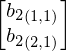

In [9]:
display(b_2)

Keeping in mind that $\boldsymbol{\delta_2}$ is the same shape as $\boldsymbol{b_2}$,

$\boldsymbol{w_2}$ looks like this:

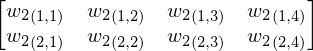

In [10]:
display(w_2)

How is this supposed to work out? They're not the same shape! We can't hope to get there with shape-preserving operations!

Well, we don't have to preserve shape, we just need to put things together from other things that they depend on. You can have more than one thing in $\boldsymbol{w_2}$ depend on a single item in $\boldsymbol{b_2}$. Specifically, differentiation rules show that we'll be using the *Sum Rule* in addition to the Chain Rule and company. This means we'll need to multiply things together, sum them, and stick them in matrices. 

That sounds a lot like matrix multiplication... because it *is* matrix multiplication. We'll specifically be doing a special kind of matrix multiply that's called the *outer product* or *tensor product* (https://en.wikipedia.org/wiki/Outer_product). It will take two vectors and make a matrix out of them. It's like making a transformation between dimensions using two vectors. Like making a function from two vectors. In magic box terms, that looks a bit like this:

<img src = 'assets/outer_product_op.png'>

**Note: Transpose and Outer Product functions make functions from their inputs. Since having an arrow to another magic box would be confusing, we show the functions being operated on as being enclosed in bubbles. A magic box enters another one as a bubble, and exits as a modified version of itself. A pair of pegs gets combined to make a peg mapping magic box, and exits the magic box in a bubble. 
**

If we look at the Chain Rule formulas again, we see that we need to multiply our $\boldsymbol{\delta_2}$ by the derivative $\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{w_2}}$: 

$$
\frac{\partial J}{\partial \boldsymbol{ w_2 }}
=
\frac{\partial J}{ \partial \boldsymbol{y ̂ }}  
\frac{\partial \boldsymbol{y ̂ }}{\partial \boldsymbol{z_2} }  
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{w_2} }
=
\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{w_2}}
$$

Applying differentiation rules, we see that it's equal to the **activations of the hidden layer** $\boldsymbol{a}$.

$$
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{w_2}}
=
\frac{\partial}{\partial \boldsymbol{w_2}}
\left( \boldsymbol{w_2 a}+\boldsymbol{b_2}\right)
=
\boldsymbol{a}$$

Now, $\boldsymbol{a}$ is the same shape, (4,1), as $\boldsymbol{b_1}$ which looks like this:

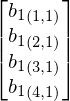

In [11]:
display(b_1)

$\boldsymbol{b_2}$ is shaped like (2,1) and looks like this:

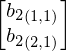

In [12]:
display(b_2)

Can we make a (2,4) shape matrix from a (2,1) and a (4,1)? Intuitively, if you have something of the shape output by a matrix multiply, and something of the shape going into a matrix multiply, you should be able to reconstruct a matrix of the same shape used in the multiply. With the outer product, we can do exactly that and make a matrix from two vectors:

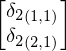

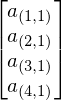

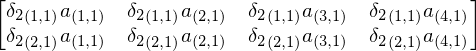

In [13]:
display(delta_2, hidden_activations)
display(delta_2*hidden_activations.T)

This is the right shape, and actually gives us our gradient for incrementing $\boldsymbol{w_2}$, but let's zoom in a bit, and take a look at why.

 Looking at the forward pass, we can examine what $\boldsymbol{z_2}=\boldsymbol{w_2 a}+\boldsymbol{b_2}$:

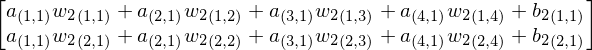

In [14]:
w_2*hidden_activations+b_2

Hmm, those expressions look very similar. If you *remove the addition symbols*, and *got rid of the biases and $w_2$ factors*, it looks like you could multiply $\boldsymbol{\delta_2}$ by each column to get the same result as the outer product between $\boldsymbol{\delta_2}$ and $\boldsymbol{a}$. You can see that as seen mentioned in the lecture notes for CS231N, the pieces of $\boldsymbol{\delta_2}$ are distributed amongst its dependants in $\boldsymbol{a}$, **splitting along sum gates**.

Now we need to backpropagate our gradients through the hidden layer to the biases and weights on the other side. If we look at a matrix transpose operation as taking a transformation between dimensions and flipping it, then we can use $\boldsymbol{w_2}$ to at least get our gradients in the shape we want. Essentially, with the matrix transpose, we have another magic box that takes in magic boxes, and spits out new magic boxes. 

<img src = 'assets/transpose_op.png'>

Our equations of interest (again from the Chain Rule formulas):

$$\frac{\partial J}{\partial \boldsymbol{b_1}}
=
\frac{\partial J}{\partial \boldsymbol{y ̂}} 
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}} 
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} }  
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} } 
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{b_1} }
=
\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} } 
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} } 
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{b_1}}
$$

$$
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a}}
=
\frac{\partial}{\partial \boldsymbol{a}}
\left( \boldsymbol{w_2 a}+\boldsymbol{b_2}\right)
=
\boldsymbol{w_2}^T
$$

$$
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{b_1}}
=
\frac{\partial}{\partial \boldsymbol{b_1}}
\left( \boldsymbol{w_1 x}+\boldsymbol{b_1}\right)
=
\boldsymbol{1}
$$

$$\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} }
=
\langle \boldsymbol{w_2},\boldsymbol{\delta_2}\rangle
=
\boldsymbol{w_2} \cdot \boldsymbol{\delta_2} 
=
\boldsymbol{w_2}^T\boldsymbol{\delta_2}
$$

Where $\langle \boldsymbol{w_2},\boldsymbol{\delta_2}\rangle$ is the **inner product** (in this case, called the **dot product**) of the matrices $\boldsymbol{w_2}$ and $\boldsymbol{\delta_2}$ :
https://en.wikipedia.org/wiki/Inner_product_space
https://en.wikipedia.org/wiki/Dot_product

We can see that we have $\boldsymbol{w_2}^T$ as a factor, which is (4,2) shaped, and looks like this:

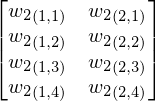

In [15]:
display(w_2.T)

$\boldsymbol{\delta_2}$ is (2,1) shaped, and looks like this:

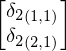

In [16]:
display(delta_2)

If we multiply them together as $\boldsymbol{w_2}^T\boldsymbol{\delta_2}$, we get:

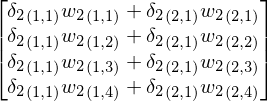

In [17]:
w_2.T*delta_2

Which is (4,1) shaped, just what we need for incrementing the bias vector $\boldsymbol{b_1}$. Except for one element-wise factor, that is. We need the derivative of the hidden layer's activation w.r.t its input. Once we multiply that through, we'll have our $\boldsymbol{\delta_1}$ which is the gradient that we can use to move our $\boldsymbol{b_1}$ in the direction of *goodness*.

$$
\frac{\partial J}{\partial \boldsymbol{b_1}}
=
\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} } 
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} } 
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{b_1}}
=
\langle \boldsymbol{w_2},\boldsymbol{\delta_2}\rangle
\odot \frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} }
\odot \boldsymbol{1}
=
\boldsymbol{\delta_1} \odot \boldsymbol{1}
=
\boldsymbol{\delta_1} 
$$

Now we need to compute our $\frac{\partial J}{\partial \boldsymbol{ w_1 }}$ gradient for incrementing our weight matrix $\boldsymbol{ w_1 }$. Another peek at our formulas shows that we have one more shape-changing outer product to go.

$$
\frac{\partial J}{\partial \boldsymbol{ w_1 }}
=
\frac{\partial J}{\partial \boldsymbol{y ̂}} 
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}} 
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} } 
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} } 
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{w_1}}
=
\boldsymbol{\delta_1}
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{ w_1 }}
$$

$$
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{ w_1 }}
=
\frac{\partial}{\partial \boldsymbol{ w_1 }}
\left( \boldsymbol{w_1 x}+\boldsymbol{b_1}\right)
=
\boldsymbol{x}^T
$$

$$
\frac{\partial J}{\partial \boldsymbol{w_1}}
=
\boldsymbol{\delta_1}
\otimes
\boldsymbol{x}
=
\boldsymbol{\delta_1}
\boldsymbol{x}^T
$$

We'll multiply that out, and you can again see that distribution of gradients through summing operations at work here:

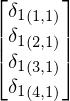

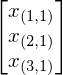

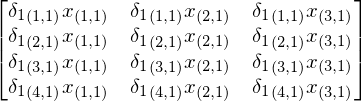

In [18]:
display(delta_1, input_x)
display(delta_1*input_x.T)

That last matrix is our gradient $\frac{\partial J}{\partial \boldsymbol{w_1}}$, and we're now done!

Just for reference, here's the corresponding feedforward portion $\boldsymbol{z_1}$ so you can see the distribution of the gradient through sum gates again:

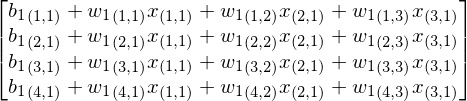

In [19]:
display(w_1*input_x+b_1)

That concludes this example, but keep in mind that to backpropagate through more layers simply requires repeating the last few steps until you have all the gradients you need. You're after those $\boldsymbol{\delta}$ vectors, and the rest is rather simple.

Now, we’re missing a few element-wise factors when we look at the shape this way, but let’s fill those in. Chain rule says we need these things for all the derivatives for a one-hidden-layer network. We’re missing these activation function derivatives and this cost function derivative w.r.t to y_approx. We pretty much know those if we know what activation and cost functions we’re using. We'll use sigmoid with MSE for the sake of finishing this example, but keep in mind that you can use ReLU or Softmax activations, and Cross-Entropy loss too:
* https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
* https://en.wikipedia.org/wiki/Softmax_function
* https://en.wikipedia.org/wiki/Cross_entropy

MSE gives the loss function:

$$
\frac{1}{m}
\sum^{m}_{i=1}
(\boldsymbol{y}-\hat{\boldsymbol{y}})^2
$$

Differentiation rules tell us to sum all $m$ derivatives, bring down the power of 2 to cancel the $\frac{1}{2}$ factor, and bring out the negative sign due to the Chain Rule. This results in a derivative that looks like:

$$\frac{\partial J}{\partial \boldsymbol{\hat{\boldsymbol{y}}}}
=
-(\boldsymbol{y}-\hat{\boldsymbol{y}})
=
(\hat{\boldsymbol{y}}-\boldsymbol{y})$$

Sigmoid units have the form:

$$\boldsymbol{\sigma}(\boldsymbol{z})=\frac{1}{1+e^{-\boldsymbol{z}}}$$

Which has the derivative (see http://mathworld.wolfram.com/SigmoidFunction.html):

$$
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z}}
=
\frac{\partial \boldsymbol{\sigma(\boldsymbol{z})}}{\partial \boldsymbol{z}}
=
\boldsymbol{\sigma}(\boldsymbol{z})(1-\boldsymbol{\sigma}(\boldsymbol{z}))
$$

Plug those into your equations and you get:

$$
\frac{\partial J}{\partial \boldsymbol{b_2}}
=
\frac{\partial J}{\partial \boldsymbol{y ̂}}  
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}}
=
\frac{\partial J}{\partial \boldsymbol{y ̂}}  
\odot
\frac{\partial \boldsymbol{y ̂}}{\partial\boldsymbol{z_2}}
=
(\hat{\boldsymbol{y}}-\boldsymbol{y})
\odot
\left[\boldsymbol{\sigma}(\boldsymbol{z})(1-\boldsymbol{\sigma}(\boldsymbol{z}))\right]
=
\boldsymbol{\delta_2}
$$

$$\frac{\partial J}{\partial \boldsymbol{ w_2 }}
=
\boldsymbol{\delta_2}
\otimes
\boldsymbol{a}
=
\boldsymbol{\delta_2}\boldsymbol{a}^T
=
(\hat{\boldsymbol{y}}-\boldsymbol{y})
\odot 
\left[\boldsymbol{\sigma}(\boldsymbol{z})(1-\boldsymbol{\sigma}(\boldsymbol{z}))\right]
\otimes
\boldsymbol{a}
$$

$$
\frac{\partial J}{\partial \boldsymbol{b_1}}
=
\boldsymbol{\delta_2}
\frac{\partial \boldsymbol{z_2}}{\partial \boldsymbol{a} } 
\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{z_1} } 
\frac{\partial \boldsymbol{z_1}}{\partial \boldsymbol{b_1}}
=
\langle \boldsymbol{w_2},\boldsymbol{\delta_2}\rangle
\odot 
\left[\boldsymbol{\sigma}(\boldsymbol{z})(1-\boldsymbol{\sigma}(\boldsymbol{z}))\right]
=
\boldsymbol{\delta_1} 
$$

$$
\frac{\partial J}{\partial \boldsymbol{w_1}}
=
\boldsymbol{\delta_1}
\otimes
\boldsymbol{x}
=
\boldsymbol{\delta_1}
\boldsymbol{x}^T
$$

That wraps up this example and this notebook! I would highly recommend checking out the code from Andrew Trask, which takes backpropagation and packages it up in an object-oriented fashion, tying into the computational graph structure we discussed, and connecting to the computational graph structure that's actually used by TensorFlow under the hood!

https://iamtrask.github.io/2017/03/21/synthetic-gradients/

We'll be moving onto Optimization and Regularization next!